# Question 1

In [0]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import normalize

In [0]:
img = cv2.imread('/content/EECE5644_2019Fall_Homework4Questions_3096_colorPlane.jpg')  

In [0]:
img1 = cv2.imread('/content/EECE5644_2019Fall_Homework4Questions_42049_colorBird.jpg')  

In [0]:
[row,col,_]=img.shape

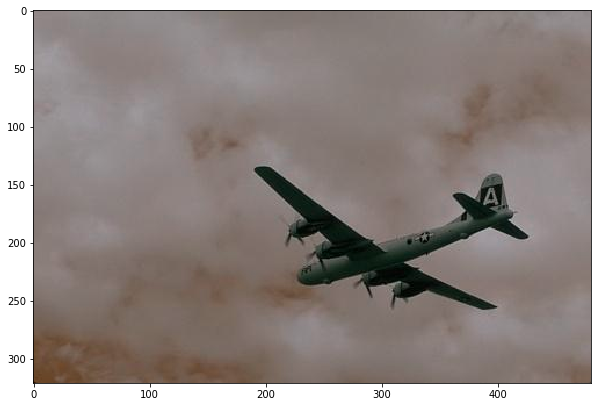

In [0]:
plt.figure(figsize=(10,10))
plt.imshow(img)

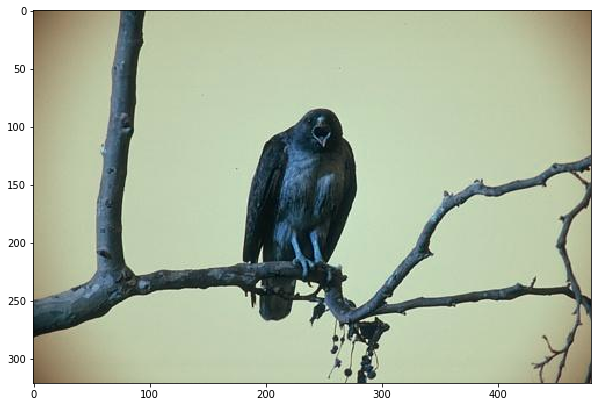

In [0]:
plt.figure(figsize=(10,10))
plt.imshow(img1)

In [0]:
vec=[]
for i in range(row):
  for j in range(col):
    [a,s,d]=img[i][j]
    vec.append([i/(row-1),j/(col-1),a/179,(s-1)/182,d/184])
vec=np.array(vec)

In [0]:
vec1=[]
for i in range(row):
  for j in range(col):
    [a,s,d]=img1[i][j]
    vec1.append([i/(row-1),j/(col-1),a/247,s/252,d/244])
vec1=np.array(vec1)

In [0]:
for i in range(vec.shape[1]):
  vec1[:,i]=(vec1[:,i]-np.min(vec1[:,i])) / (np.max(vec1[:,i])-np.min(vec1[:,i]))

In [0]:
vec1[:,4].max(),vec1[:,4].min()

(1.0, 0.0)

In [0]:
vec[:,4].max(),vec[:,4].min()

(1.0, 0.0)

In [0]:
row,col

(321, 481)

In [0]:
class K_Means:
    def __init__(self, k, tol=0.001, max_iter=300):
        self.k = k
        self.tol = tol
        self.max_iter = max_iter

    def fit(self,data):

        self.centroids = {}

        for i in range(self.k):
            self.centroids[i] = data[i]

        for i in range(self.max_iter):
            self.classifications = {}

            for i in range(self.k):
                self.classifications[i] = []

            for featureset in data:
                distances = [np.linalg.norm(featureset-self.centroids[centroid]) for centroid in self.centroids]
                classification = distances.index(min(distances))
                self.classifications[classification].append(featureset)

            prev_centroids = dict(self.centroids)

            for classification in self.classifications:
                self.centroids[classification] = np.average(self.classifications[classification],axis=0)

            optimized = True

            for c in self.centroids:
                original_centroid = prev_centroids[c]
                current_centroid = self.centroids[c]
                if np.sum((current_centroid-original_centroid)/original_centroid*100.0) > self.tol:
                    print(np.sum((current_centroid-original_centroid)/original_centroid*100.0))
                    optimized = False

            if optimized:
                break

    def predict(self,data):
        distances = [np.linalg.norm(data-self.centroids[centroid]) for centroid in self.centroids]
        classification = distances.index(min(distances))
        return classification

In [0]:
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=2)

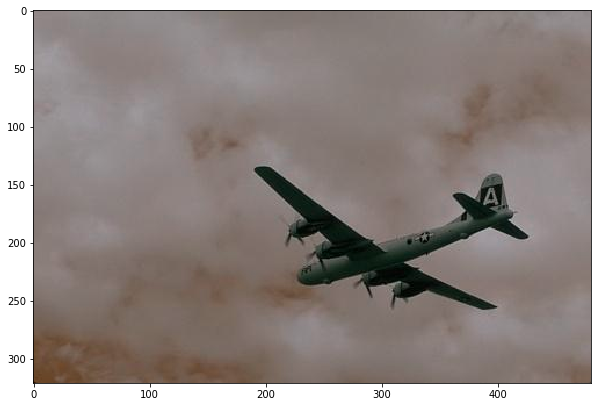

In [0]:
plt.figure(figsize=(10,10))
plt.imshow(img)

In [0]:

def plot_knn(c,X):
  kmeans=KMeans(n_clusters=c)
  kmeans.fit(X)
  pred=kmeans.predict(X)
  plt.figure(figsize=(10,10))
  plt.title("No. of clusters = {}".format(c))
  plt.imshow(pred.reshape(row,col))
  


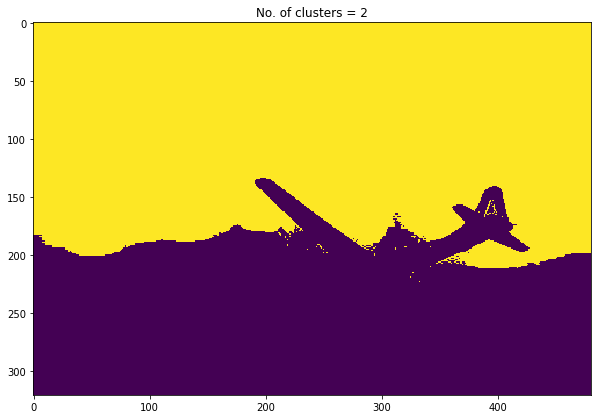

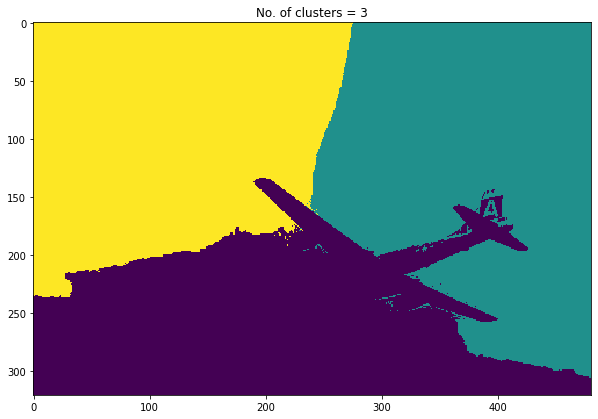

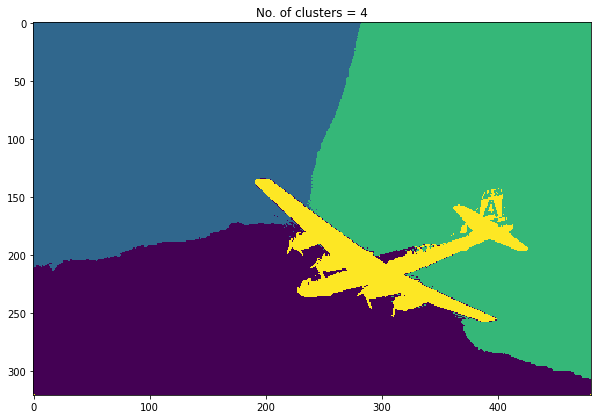

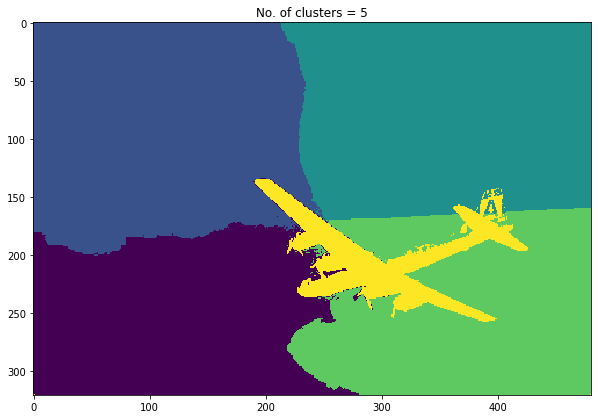

In [0]:
for i in range(2,6):
  plot_knn(i,vec)

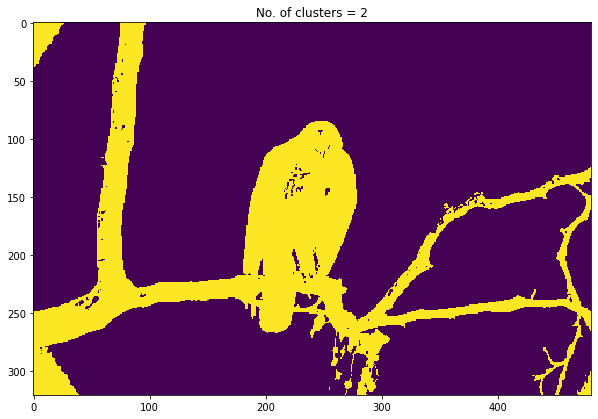

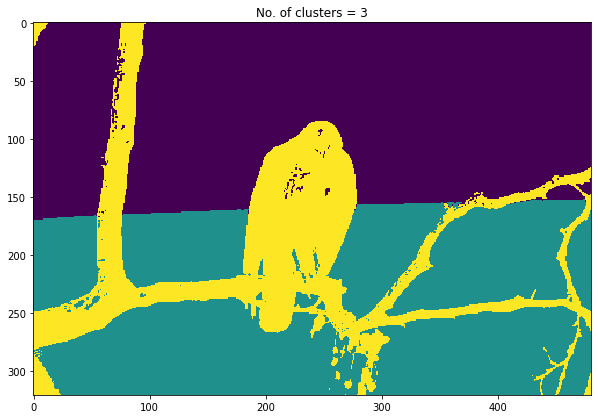

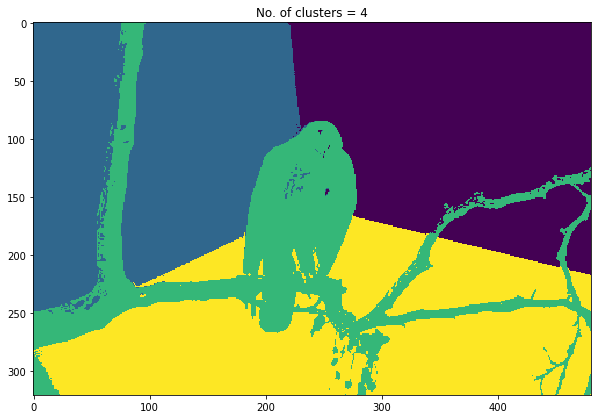

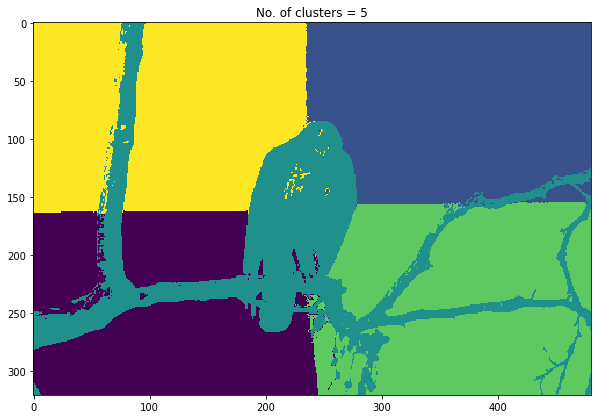

In [0]:
for i in range(2,6):
  plot_knn(i,vec1)

In [0]:


from sklearn.mixture import GaussianMixture

In [0]:
def plot_gmm(c,X):
  gmm=GaussianMixture(n_components=c,covariance_type="full",init_params="kmeans")
  gmm.fit(X)
  pred=gmm.predict(X)
  plt.figure(figsize=(10,10))
  plt.title("No. of clusters = {}".format(c))
  plt.imshow(pred.reshape(row,col))
  


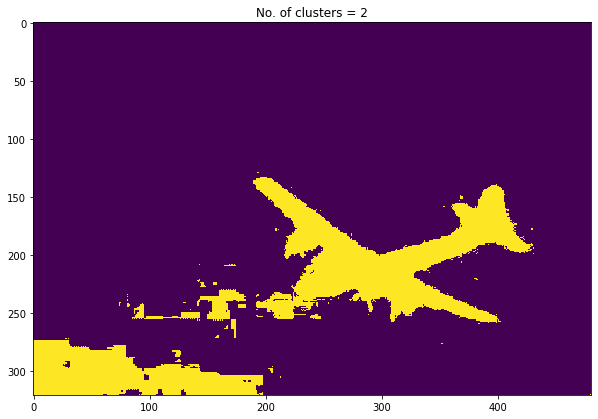

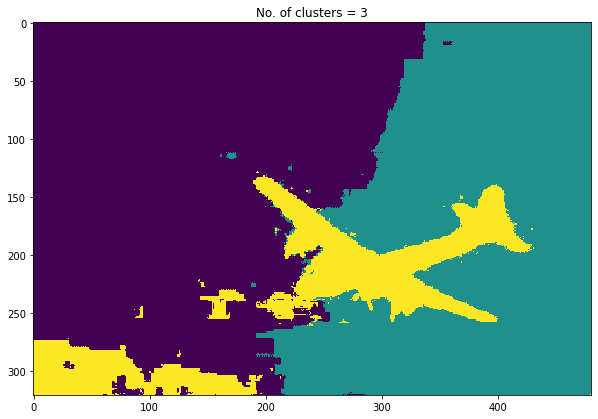

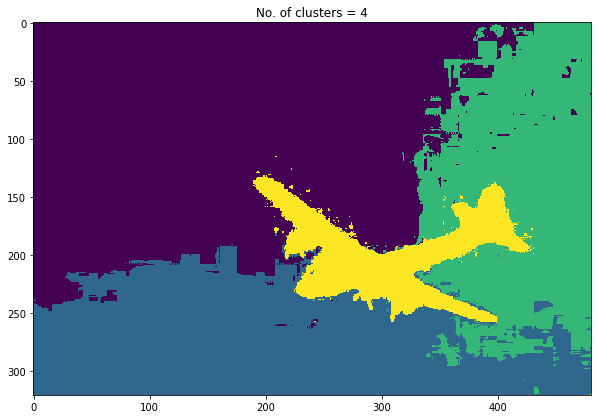

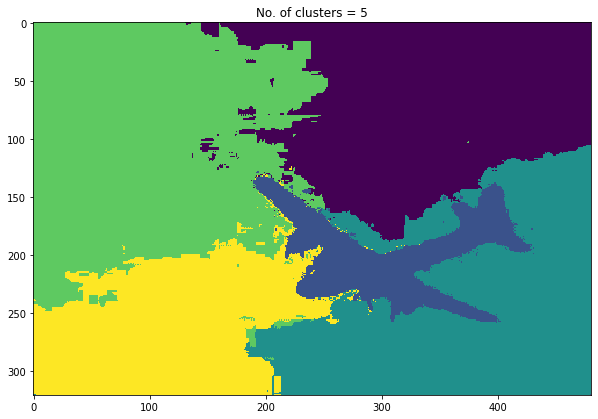

In [0]:
for i in range(2,6):
  plot_gmm(i,vec)

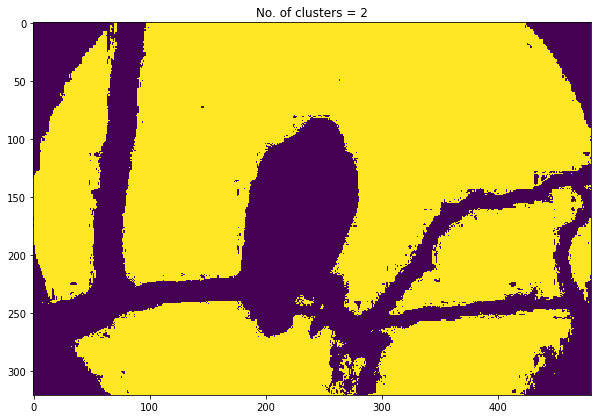

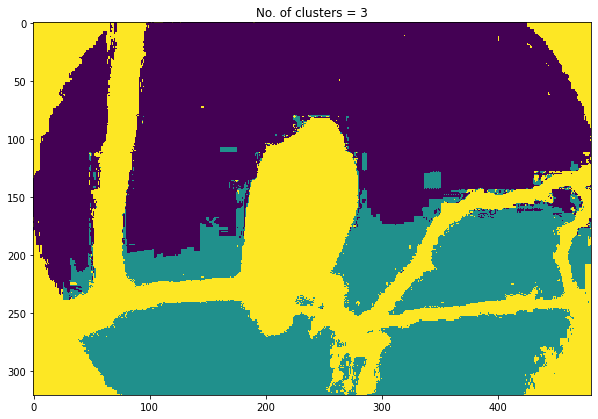

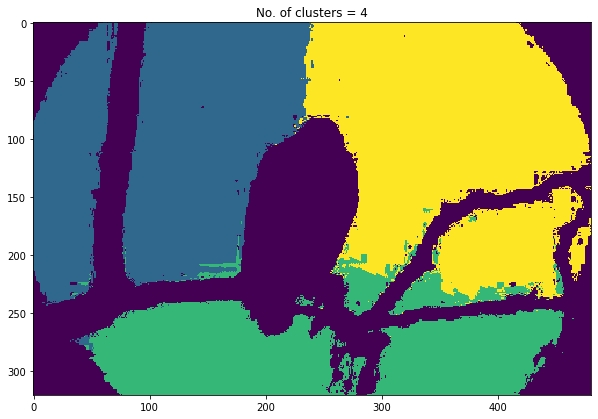

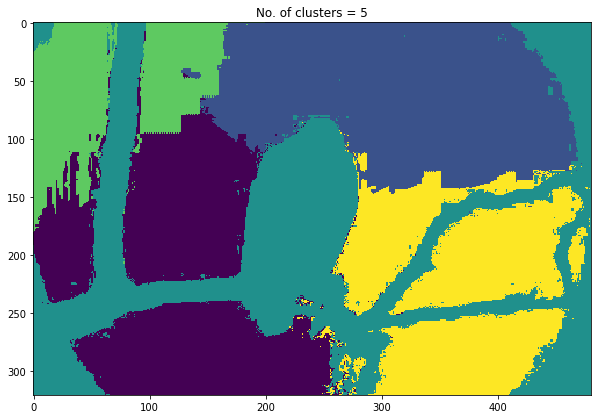

In [0]:
for i in range(2,6):
  plot_gmm(i,vec1)

# Question 2

In [0]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from numpy.linalg import inv,pinv
from numpy.linalg import det
from numpy.linalg import norm
import cvxopt
import cvxopt.solvers
from cvxopt import matrix as cvxopt_matrix
from cvxopt import solvers as cvxopt_solvers
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.covariance import empirical_covariance as ecov

from sklearn.datasets import make_spd_matrix # crating positive semidefinite matrix
from numpy import linalg as LA
%matplotlib inline

In [0]:
def Sample_Generator(p_w1,p_w2):
  N = np.random.uniform( size=1000)
  n1=N[N<=p_w1]
  n2=N[(N>p_w1)]
  return(len(n1),len(n2))

In [0]:
def viz_data_points_single(o1,c):
  
  
  plt.figure(figsize=(15,15))
  plt.scatter(o1[0],o1[1],label='label_{}'.format(c))
  
  plt.title('Visualization of multivariate data points')
  
  plt.legend()
  plt.xlabel('X-axis')
  plt.ylabel('Y-axis')

def viz_data_points(o1,o2):
  
  
  plt.figure(figsize=(15,15))
  plt.scatter(o1[0],o1[1],label='label_1')
  plt.scatter(o2[0],o2[1],label='label_2')
  plt.title('Visualization of multivariate data points')
  
  plt.legend()
  plt.xlabel('X-axis')
  plt.ylabel('Y-axis')
  

In [0]:
def class1(n): # generate class 1
  mean1=[0,0]
  cov1=np.array([[1,0],[0,1]])
  o1 = np.random.multivariate_normal(mean1, cov1, (n1))
  return(o1.T,np.ones(n)*(0))
def class2(n): # generate class 2
  r= np.random.uniform(low=2,high=3, size=n)
  theta= np.random.uniform(low=-np.pi,high=np.pi, size=n)
  x = r * np.cos( theta )
  y = r * np.sin( theta )
  return(np.vstack((x,y)),np.ones(n))


In [0]:
p_w1=0.35
p_w2=0.65
n1,n2=Sample_Generator(p_w1,p_w2)

o1,l1=class1(n1)
o2,l2=class2(n2)

X=np.hstack((o1,o2)).T
y=np.hstack((l1,l2))




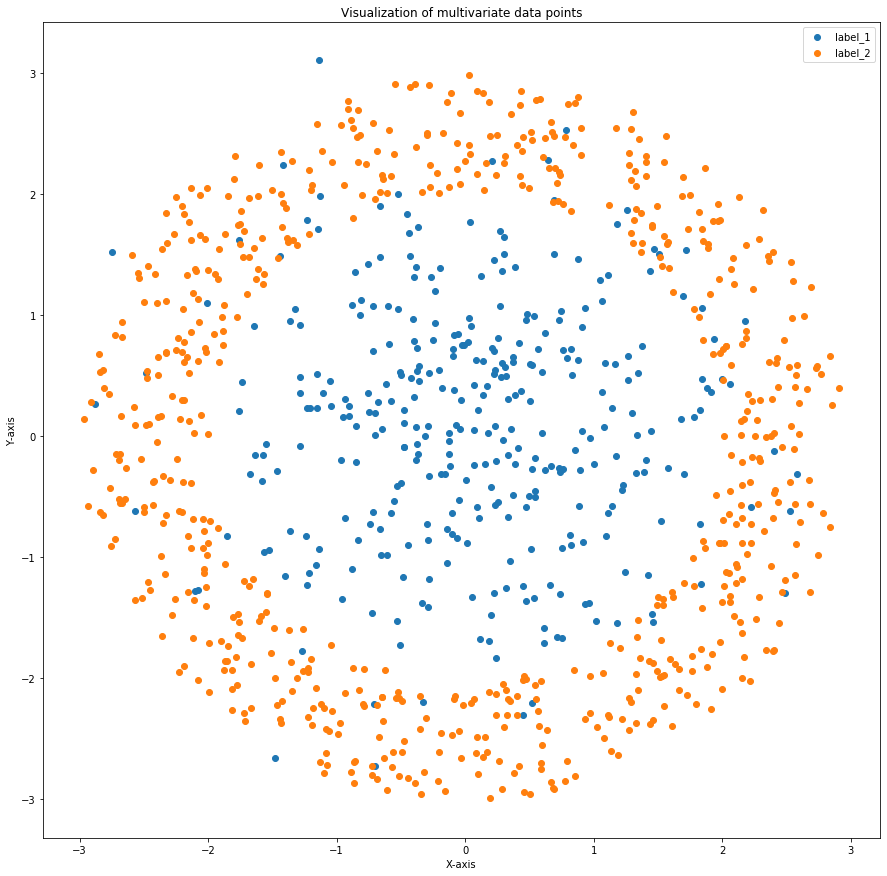

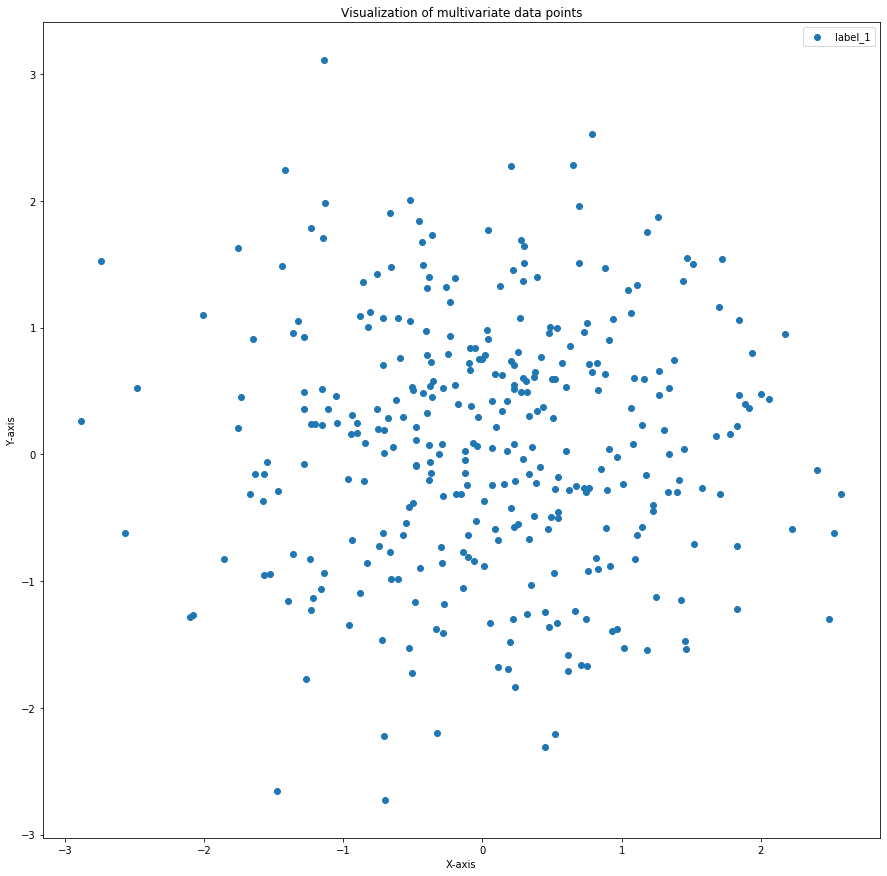

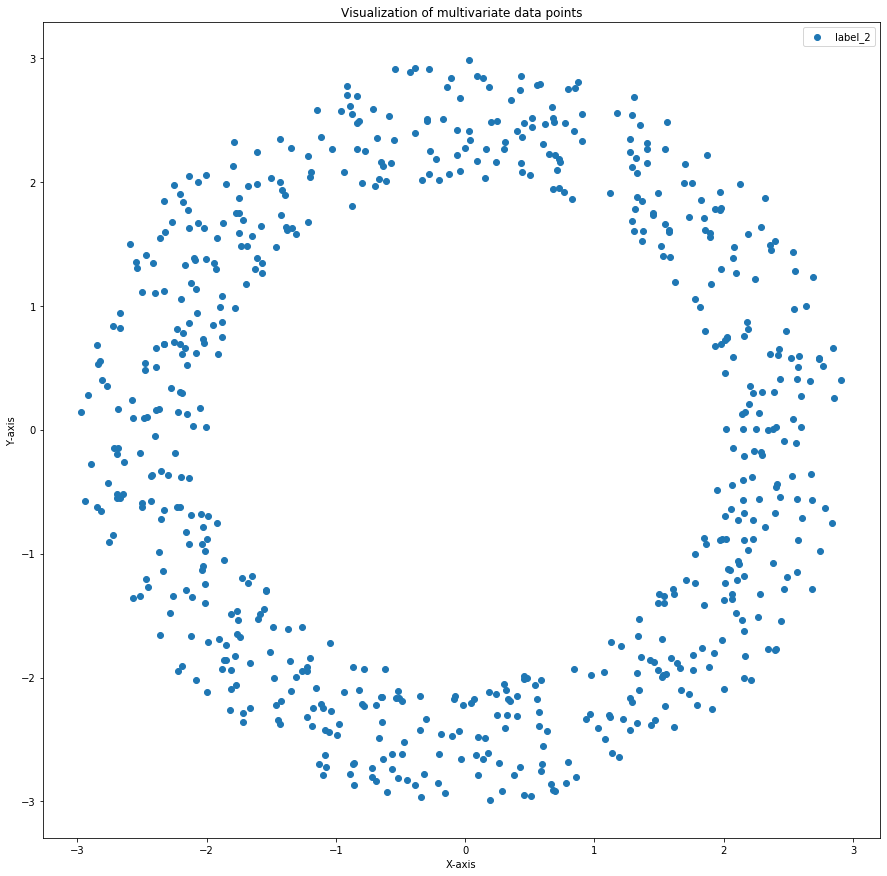

In [0]:
viz_data_points(o1,o2)
viz_data_points_single(o1,1)
viz_data_points_single(o2,2)

In [0]:
from sklearn.model_selection import KFold
from sklearn.svm import SVC
y=y.ravel()

In [0]:
train=[]
validation=[]
loop=[10**i for i in range(-4,5,1)]
for i in loop:
  print(i)
 
  ts = []
  vs=[]
  clf = SVC(C = i, kernel = 'linear')
  cv = KFold(n_splits=10, shuffle=True,)
  for train_index, test_index in cv.split(X):
      X_train, X_test, y_train, y_test = X[train_index], X[test_index], y[train_index], y[test_index]
      clf.fit(X_train, y_train)
      ts.append(np.mean(clf.predict(X_train)==y_train))
      vs.append(np.mean(clf.predict(X_test)==y_test))
  train.append(np.array(ts))
  validation.append(np.array(vs))

0.0001
0.001
0.01
0.1
1
10
100
1000
10000


In [0]:
train_l=np.mean(np.array(train),axis=1)
train_var_l=np.var(np.array(train),axis=1)

In [0]:
val_l=np.mean(np.array(validation),axis=1)
val_var_l=np.var(np.array(validation),axis=1)

Text(0.5, 1.0, 'Accuracys vs C-values for a Linear SVM classifier')

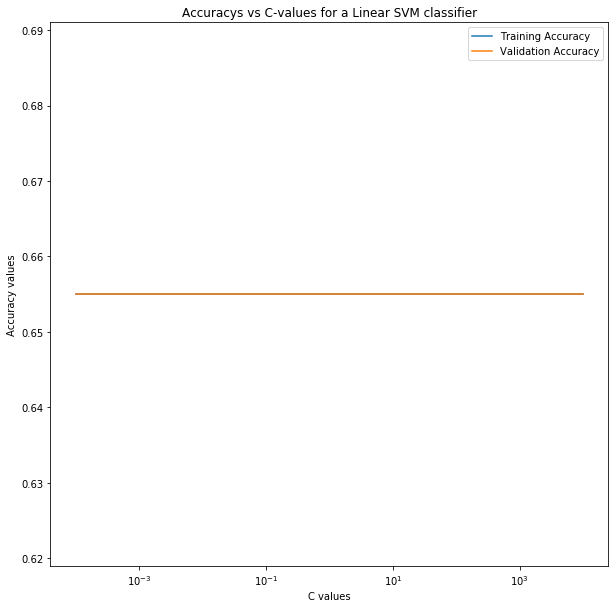

In [0]:
plt.figure(figsize=(10,10))
plt.plot(loop,train_l,label="Training Accuracy")
plt.plot(loop,val_l,label="Validation Accuracy")
plt.legend()
plt.xscale('log')
plt.xlabel("C values")
plt.ylabel("Accuracy values")
plt.title("Accuracys vs C-values for a Linear SVM classifier")

## For every C value training and testing accuracy remains the same. Thus I am choosing the c value to be 1 for moderation

In [0]:
loop,loop1

(array([1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03,
        1.e+04]),
 array([1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02,
        1.e+03, 1.e+04]))

In [0]:
loop1=[10**i for i in range(-5,5,1)]
loop=[10**i for i in range(-4,5,1)]

In [0]:
train=[]
validation=[]
for j in loop1: # loop1 refers to the range of values for gamma

  for i in loop: # loop refers to the range of values for C
    ts = []
    vs=[]
    clf = SVC(C = i, kernel = 'rbf',gamma=j)
    cv = KFold(n_splits=10, random_state=42, shuffle=True)
    for train_index, test_index in cv.split(X):
        X_train, X_test, y_train, y_test = X[train_index], X[test_index], y[train_index], y[test_index]
        clf.fit(X_train, y_train)
        ts.append(np.mean(clf.predict(X_train)==y_train))
        vs.append(np.mean(clf.predict(X_test)==y_test))
    train.append(np.array(ts))
    validation.append(np.array(vs))

In [0]:
train_rbf=np.mean(np.array(train),axis=1)
train_var_rbf=np.var(np.array(train),axis=1)

In [0]:
val_rbf=np.mean(np.array(validation),axis=1)
val_var_rbf=np.var(np.array(validation),axis=1)

In [0]:
loop=np.array(loop)
loop1=np.array(loop1)

In [0]:
train_rbf

array([0.655     , 0.655     , 0.655     , 0.655     , 0.655     ,
       0.655     , 0.655     , 0.655     , 0.655     , 0.655     ,
       0.655     , 0.655     , 0.655     , 0.655     , 0.655     ,
       0.655     , 0.655     , 0.81022222, 0.655     , 0.655     ,
       0.655     , 0.655     , 0.655     , 0.655     , 0.80733333,
       0.93555556, 0.93911111, 0.655     , 0.655     , 0.655     ,
       0.655     , 0.76755556, 0.93377778, 0.93933333, 0.94011111,
       0.94088889, 0.655     , 0.655     , 0.655     , 0.91288889,
       0.93633333, 0.93922222, 0.94033333, 0.94311111, 0.94344444,
       0.655     , 0.655     , 0.73966667, 0.91933333, 0.93677778,
       0.94366667, 0.95466667, 0.95911111, 0.96222222, 0.655     ,
       0.655     , 0.655     , 0.879     , 0.94955556, 0.96333333,
       0.97977778, 0.99177778, 0.99911111, 0.655     , 0.655     ,
       0.655     , 0.655     , 0.97611111, 0.99277778, 1.        ,
       1.        , 1.        , 0.655     , 0.655     , 0.655  

In [0]:
xx,yy=np.meshgrid(loop,loop1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The following kwargs were not used by contour: 'level'
  


Text(0.5, 1.0, 'Locating accuracy values against gamma and C for training dataset')

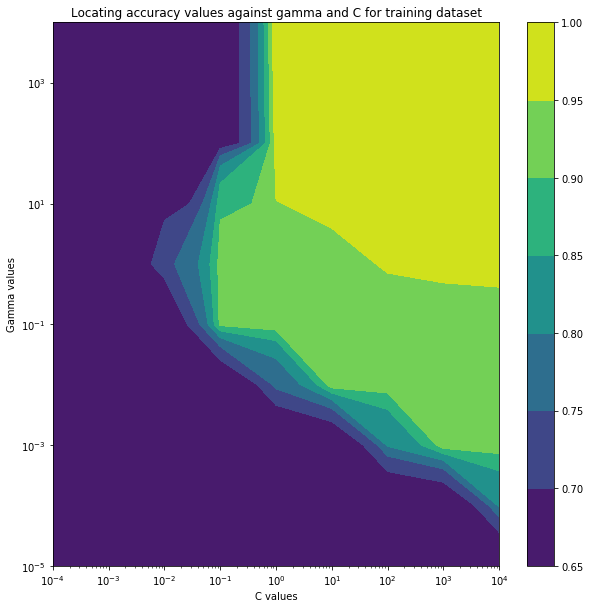

In [0]:
plt.figure(figsize=(10,10))
plt.contourf(xx,yy,train_rbf.reshape(xx.shape),level=[50,60,70,80,90,100])
plt.xscale('log')
plt.yscale('log')
plt.colorbar()
plt.xlabel("C values")
plt.ylabel("Gamma values")
plt.title("Locating accuracy values against gamma and C for training dataset")

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The following kwargs were not used by contour: 'level'
  


Text(0.5, 1.0, 'Locating accuracy values against gamma and C for Validation dataset')

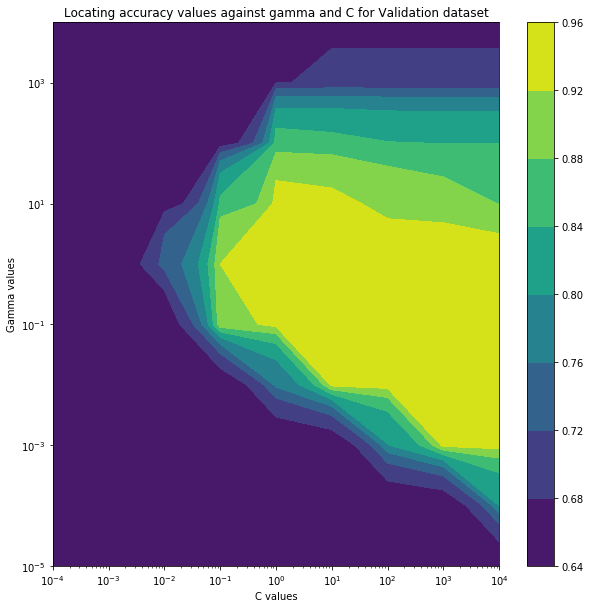

In [0]:
plt.figure(figsize=(10,10))
plt.contourf(xx,yy,val_rbf.reshape(xx.shape),level=[50,60,70,80,90,100])
plt.xscale('log')
plt.yscale('log')
plt.colorbar()
plt.xlabel("C values")
plt.ylabel("Gamma values")
plt.title("Locating accuracy values against gamma and C for Validation dataset")

## For the validation set with RBF kernel I am going to select Gamma with value 10 and C with value 1

In [0]:

o1.max(),o1.min()

(3.1117122437966502, -2.880688004652407)

In [0]:
o2.max(),o2.min()

(2.9835655850634666, -2.990483632061514)

In [0]:
xmin=np.array([o1[0,:].min(),o2[0,:].min()]).min()
xmax=np.array([o1[0,:].max(),o2[0,:].max()]).max()
ymin=np.array([o1[1,:].min(),o2[1,:].min()]).min()
ymax=np.array([o1[1,:].max(),o2[1,:].max()]).max()

In [0]:
xx,yy=np.meshgrid(np.linspace(xmin-1,xmax+1,50),np.linspace(ymin-1,ymax+1,50))

In [0]:
grid=np.vstack((xx.ravel(),yy.ravel()))

In [0]:
grid

array([[-3.96717093, -3.8064018 , -3.64563267, ...,  3.58897832,
         3.74974746,  3.91051659],
       [-3.99048363, -3.99048363, -3.99048363, ...,  4.11171224,
         4.11171224,  4.11171224]])

## Training Linear SVM with the decided c value of 1

In [0]:
clf = SVC(C = 1, kernel = 'linear')
clf.fit(X,y)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [0]:
grid1=clf.predict(grid.T)

In [0]:
x_pred=clf.predict(X)

# We can see from here that in a linear cvm classifier all the classes are classsified as beloning to class 1,Owing to the higher percentage of data points in class 1 we get the accuracy only because they are erroneously classified to a single class.

In [0]:
from sklearn.metrics import classification_report, confusion_matrix

In [0]:
confu1=confusion_matrix(y,x_pred)

In [0]:
tt=pd.DataFrame(confu1,columns=["predicted class 0","Predicted class 1"],index=["Real class 0"," Real class 1"])

In [0]:
print("The number of labels in class 0 are  {} and the number of label in class 1 are {}".format(n1,n2))
print("The predicted accuracy is {}".format((confu1[0][0]+confu1[1][1])/(n1+n2)))
print("The predicted error rate is {}".format((confu1[0][1]+confu1[1][0])/(n1+n2)))
print(tt)

The number of labels in class 0 are  338 and the number of label in class 1 are 662
The predicted accuracy is 0.662
The predicted error rate is 0.338
               predicted class 0  Predicted class 1
Real class 0                   0                338
 Real class 1                  0                662


Text(0, 0.5, 'Y-axis')

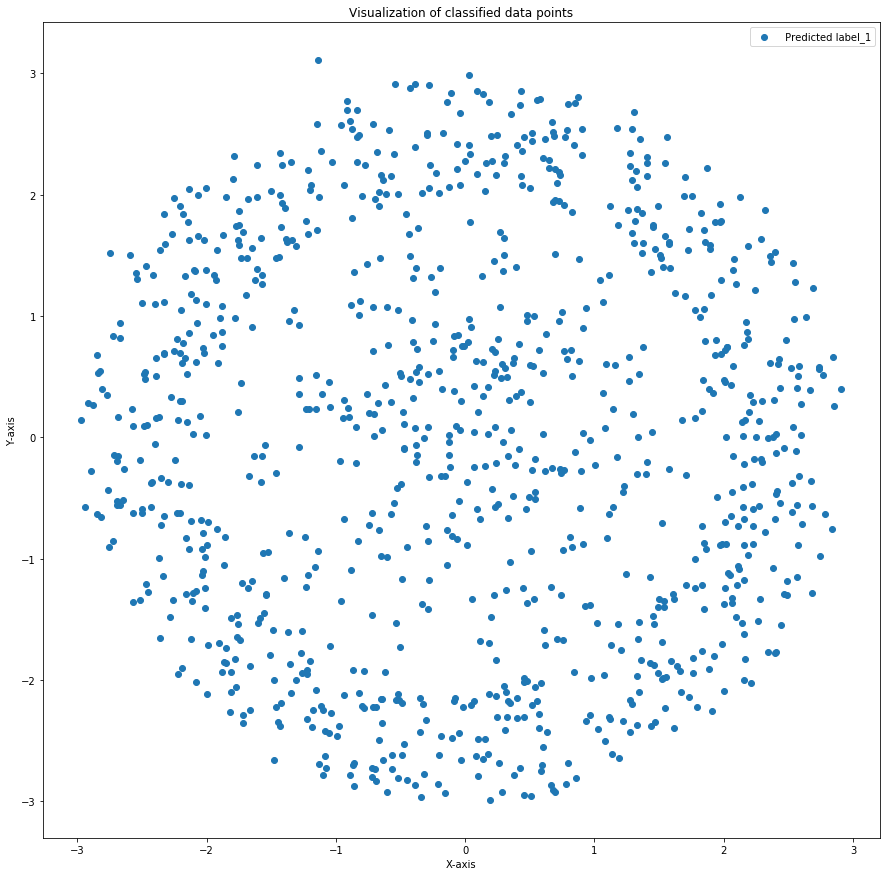

In [0]:

plt.figure(figsize=(15,15))
plt.scatter(X.T[0,:],X.T[1,:],label=' Predicted label_1')

plt.title('Visualization of classified data points')

plt.legend()
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
  

SVM with RBF Kernel

In [0]:
clf_rbf = SVC(C = 1, kernel = 'rbf',gamma=10)
clf_rbf.fit(X,y)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=10, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [0]:
pred_rbf=clf_rbf.predict(X)


In [0]:
confu_rbf=confusion_matrix(y,pred_rbf)
tt=pd.DataFrame(confu_rbf,columns=["predicted class 0","Predicted class 1"],index=["Real class 0"," Real class 1"])
print("The number of labels in class 0 are  {} and the number of label in class 1 are {}".format(n1,n2))
print("The predicted accuracy is {}".format((confu_rbf[0][0]+confu_rbf[1][1])/(n1+n2)))
print("The predicted error rate is {}".format((confu_rbf[0][1]+confu_rbf[1][0])/(n1+n2)))
print(tt)

The number of labels in class 0 are  338 and the number of label in class 1 are 662
The predicted accuracy is 0.952
The predicted error rate is 0.048
               predicted class 0  Predicted class 1
Real class 0                 291                 47
 Real class 1                  1                661


In [0]:
grid_rbf=clf_rbf.predict(grid.T)

In [0]:
a0_0=X[((y==0) & (pred_rbf==0))]
a0_1=X[((y==0) & (pred_rbf==1))]
a1_0=X[((y==1) & (pred_rbf==0))]
a1_1=X[((y==1) & (pred_rbf==1))]


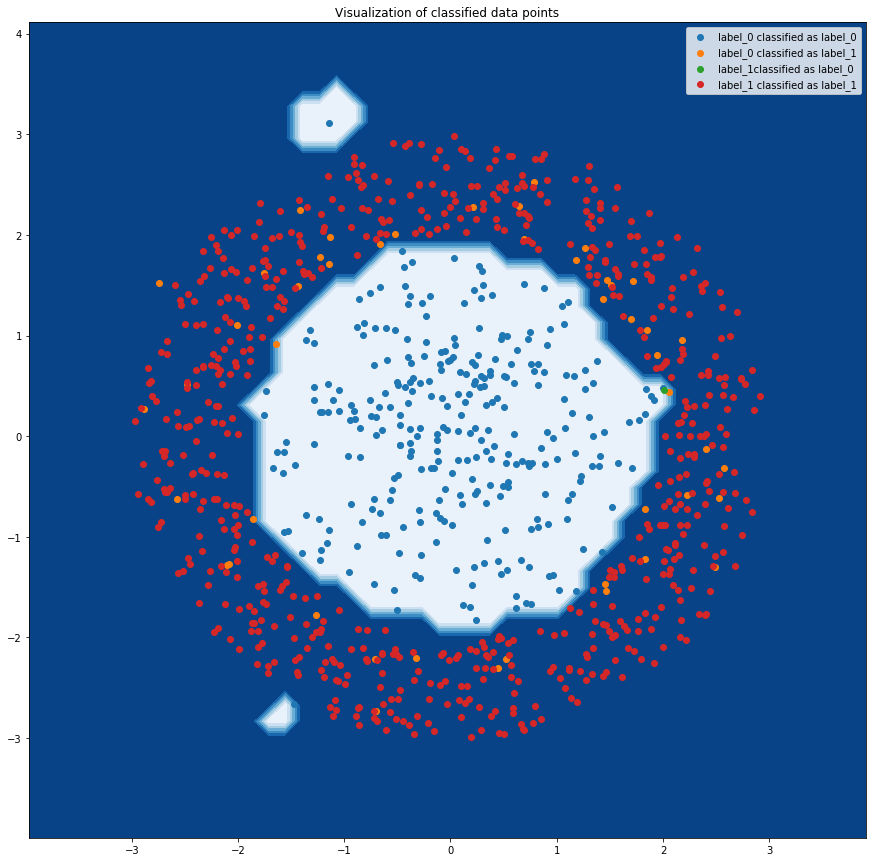

In [0]:
plt.figure(figsize=(15,15))
plt.contourf(xx,yy,grid_rbf.reshape(xx.shape),cmap='Blues')
plt.scatter(a0_0.T[0,:],a0_0.T[1,:],label='label_0 classified as label_0')
plt.scatter(a0_1.T[0,:],a0_1.T[1,:],label='label_0 classified as label_1')
plt.scatter(a1_0.T[0,:],a1_0.T[1,:],label='label_1classified as label_0')
plt.scatter(a1_1.T[0,:],a1_1.T[1,:],label='label_1 classified as label_1')
plt.title('Visualization of classified data points')
plt.legend()


We are now goint to generate new test points to test how well both the classifier perform on new data points

In [0]:
p_w1=0.35
p_w2=0.65
n1,n2=Sample_Generator(p_w1,p_w2)

o1,l1=class1(n1)
o2,l2=class2(n2)

X=np.hstack((o1,o2)).T
y=np.hstack((l1,l2))
y=y.ravel()


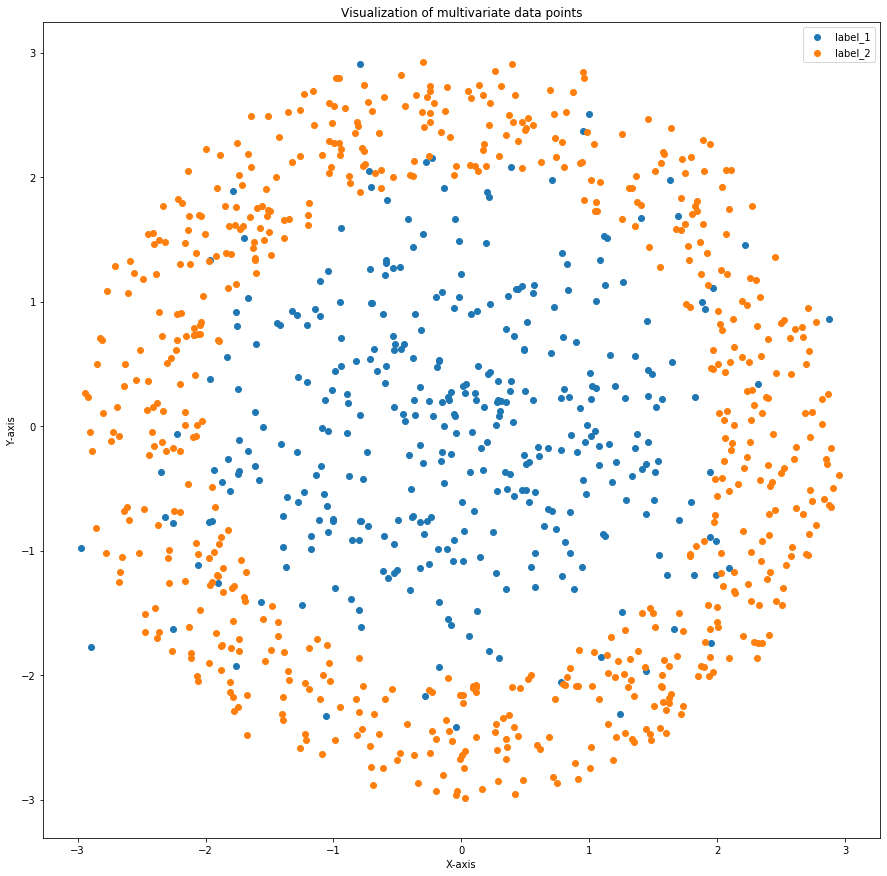

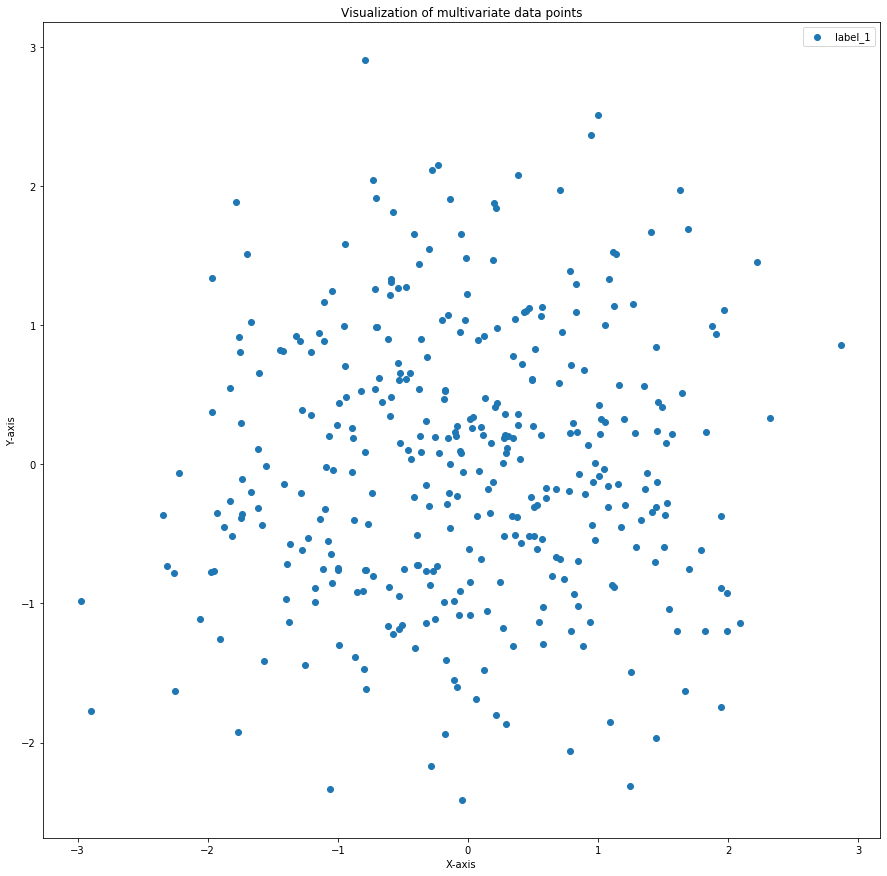

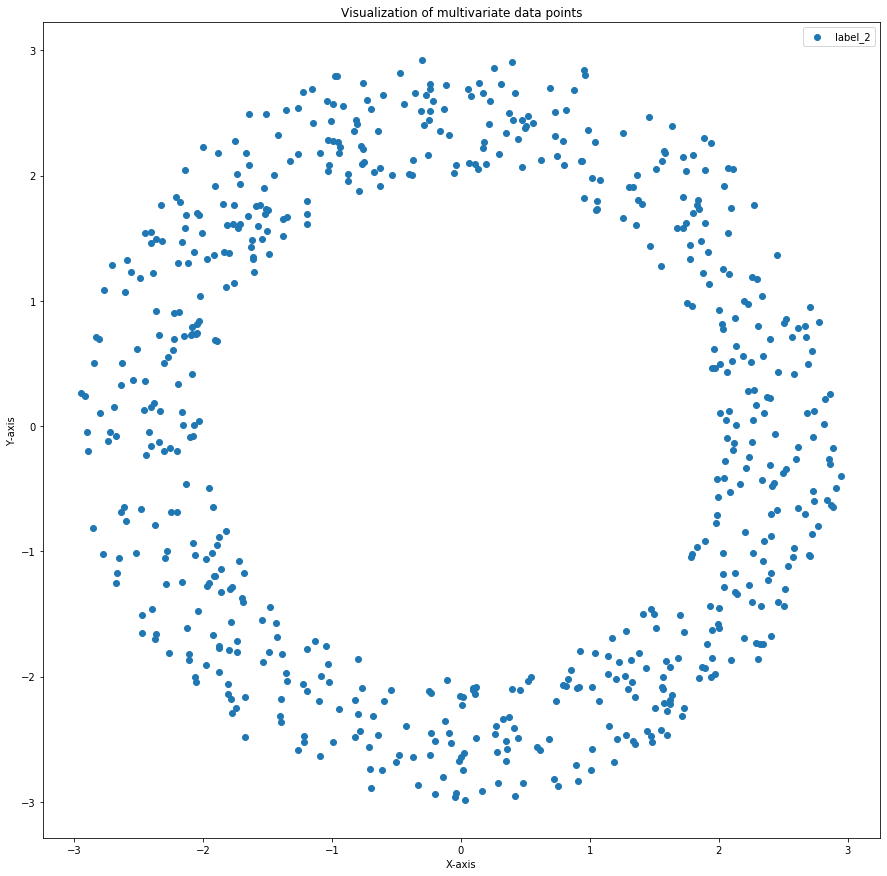

In [0]:
viz_data_points(o1,o2)
viz_data_points_single(o1,1)
viz_data_points_single(o2,2)

## At first we try the linear classifier

In [0]:
test_pred_lin=clf.predict(X)

In [0]:
confu1=confusion_matrix(y,test_pred_lin)
tt=pd.DataFrame(confu1,columns=["predicted class 0","Predicted class 1"],index=["Real class 0"," Real class 1"])
print("The number of labels in class 0 are  {} and the number of label in class 1 are {}".format(n1,n2))
print("The predicted accuracy is {}".format((confu1[0][0]+confu1[1][1])/(n1+n2)))
print("The predicted error rate is {}".format((confu1[0][1]+confu1[1][0])/(n1+n2)))
print(tt)

The number of labels in class 0 are  358 and the number of label in class 1 are 642
The predicted accuracy is 0.642
The predicted error rate is 0.358
               predicted class 0  Predicted class 1
Real class 0                   0                358
 Real class 1                  0                642


Text(0, 0.5, 'Y-axis')

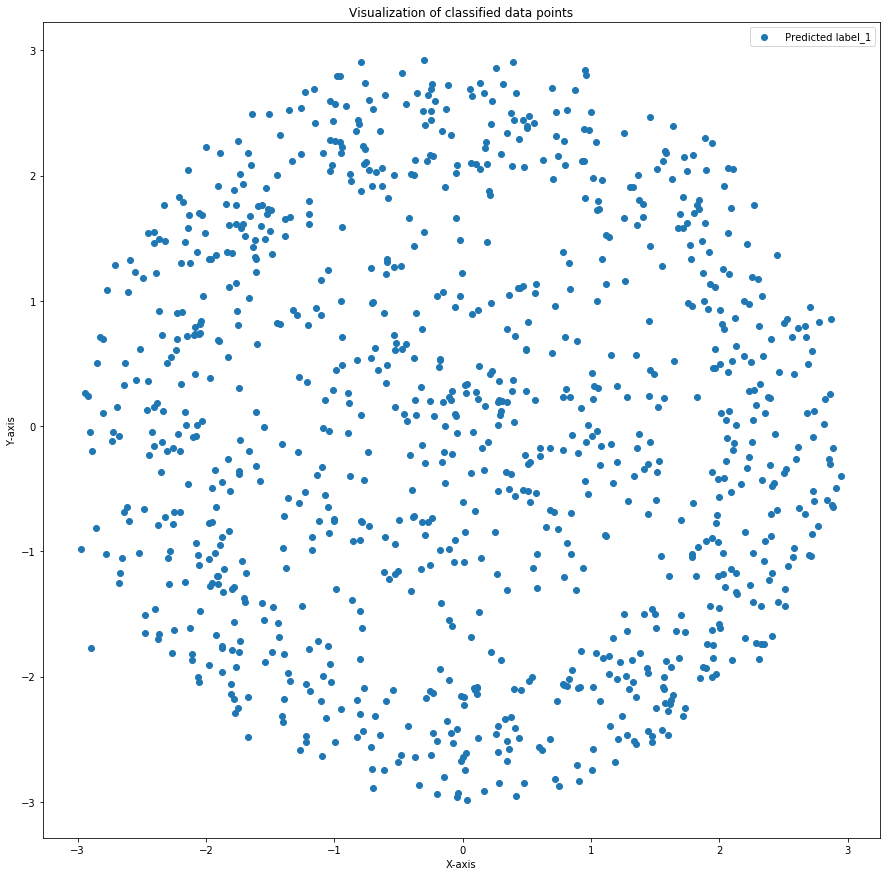

In [0]:

plt.figure(figsize=(15,15))
plt.scatter(X.T[0,:],X.T[1,:],label=' Predicted label_1')

plt.title('Visualization of classified data points')

plt.legend()
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
  

# Now we will try the RBF classifier

In [0]:
pred_rbf=clf_rbf.predict(X)


In [0]:
confu_rbf=confusion_matrix(y,pred_rbf)
tt=pd.DataFrame(confu_rbf,columns=["predicted class 0","Predicted class 1"],index=["Real class 0"," Real class 1"])
print("The number of labels in class 0 are  {} and the number of label in class 1 are {}".format(n1,n2))
print("The predicted accuracy is {}".format((confu_rbf[0][0]+confu_rbf[1][1])/(n1+n2)))
print("The predicted error rate is {}".format((confu_rbf[0][1]+confu_rbf[1][0])/(n1+n2)))
print(tt)

The number of labels in class 0 are  358 and the number of label in class 1 are 642
The predicted accuracy is 0.933
The predicted error rate is 0.067
               predicted class 0  Predicted class 1
Real class 0                 293                 65
 Real class 1                  2                640


In [0]:
a0_0=X[((y==0) & (pred_rbf==0))]
a0_1=X[((y==0) & (pred_rbf==1))]
a1_0=X[((y==1) & (pred_rbf==0))]
a1_1=X[((y==1) & (pred_rbf==1))]


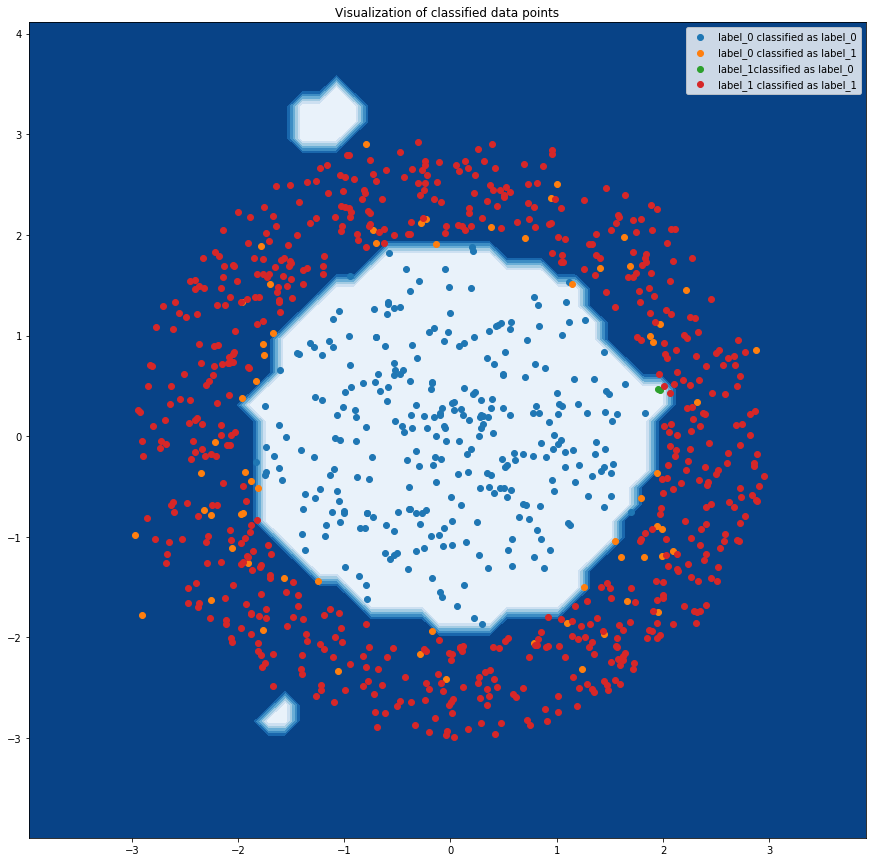

In [0]:
plt.figure(figsize=(15,15))
plt.contourf(xx,yy,grid_rbf.reshape(xx.shape),cmap='Blues')
plt.scatter(a0_0.T[0,:],a0_0.T[1,:],label='label_0 classified as label_0')
plt.scatter(a0_1.T[0,:],a0_1.T[1,:],label='label_0 classified as label_1')
plt.scatter(a1_0.T[0,:],a1_0.T[1,:],label='label_1classified as label_0')
plt.scatter(a1_1.T[0,:],a1_1.T[1,:],label='label_1 classified as label_1')
plt.title('Visualization of classified data points')
plt.legend()
